In [16]:
from nbpictures import find_urls, get_picture_from_url, get_metadata_from_url, display_finds, load_picture
from IPython.display import HTML
import skimage
from skimage import feature
import pickle
import json
import io

In [64]:
r = find_urls('vinter')

In [24]:
r[:2]

['https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digifoto_20150126_00286_NB_MIT_FNR_19842/full/{width},{height}/0/native.jpg']

In [25]:
p = get_picture_from_url(r[0], width=500)

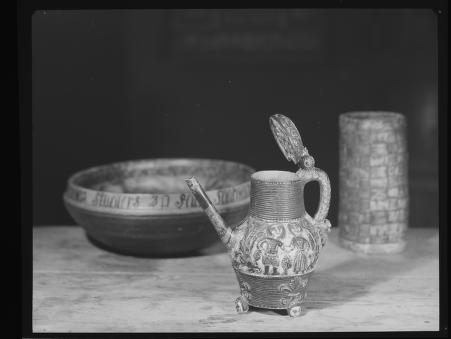

In [26]:
p

In [56]:
with io.BytesIO() as output:
    p.save(output, format='PNG')
    contents = output.getvalue()

In [56]:
fs = feature.blob_dog(p)
fs

array([[338.        , 102.        ,  42.94967296],
       [290.        ,  70.        ,  26.8435456 ],
       [264.        , 358.        ,  42.94967296],
       [156.        , 378.        ,  26.8435456 ]])

In [58]:
fs.tostring()

b'\x00\x00\x00\x00\x00 u@\x00\x00\x00\x00\x00\x80Y@=\x8c0\xe2\x8eyE@\x00\x00\x00\x00\x00 r@\x00\x00\x00\x00\x00\x80Q@K\xaf\xbc\x9a\xf2\xd7:@\x00\x00\x00\x00\x00\x80p@\x00\x00\x00\x00\x00`v@=\x8c0\xe2\x8eyE@\x00\x00\x00\x00\x00\x80c@\x00\x00\x00\x00\x00\xa0w@K\xaf\xbc\x9a\xf2\xd7:@'

In [60]:
np.frombuffer(_58)

array([338.        , 102.        ,  42.94967296, 290.        ,
        70.        ,  26.8435456 , 264.        , 358.        ,
        42.94967296, 156.        , 378.        ,  26.8435456 ])

In [55]:
np.array(np.array_str(fs))

array('[[338.         102.          42.94967296]\n [290.          70.          26.8435456 ]\n [264.         358.          42.94967296]\n [156.         378.          26.8435456 ]]',
      dtype='<U168')

In [48]:
np.fromstring(np.array_repr(fs))

C:\Users\larsj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """Entry point for launching an IPython kernel.


ValueError: string size must be a multiple of element size

In [28]:
feature.blob_doh(p)

array([[316.,  47.,  30.],
       [315., 423.,  30.]])

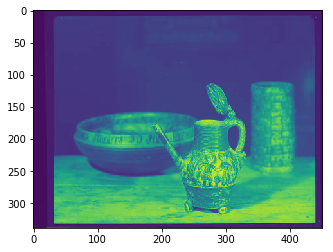

In [29]:
import matplotlib.pyplot as plt
import numpy as np
img = np.array(p)
fig, ax = plt.subplots()
ax.imshow(img)

[338.         102.          42.94967296]


IndexError: index 3 is out of bounds for axis 0 with size 3

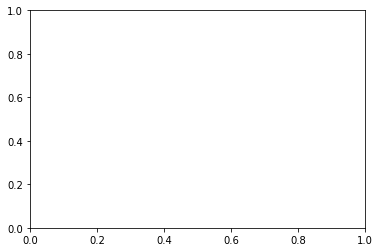

In [30]:
from matplotlib.patches import Circle, Wedge, Polygon
fig, ax = plt.subplots()
for f in fs:
    print(f)
    c = Circle((f[0], f[1]), f[3], fill=False)
    ax.add_artist(c)
ax.imshow(img)


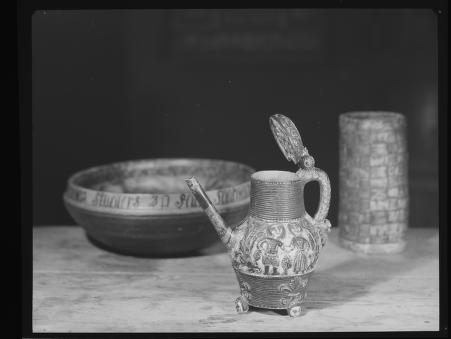

In [31]:
p

In [68]:
get_metadata_from_url(r[4]
                    )

{'Tittel': 'Vinter',
 'Dato': '01.01.1961',
 'Andre opplysninger': 'Motiv: vinter, stemning, busker',
 'Fotograf': 'Engebretsen, Gunnar',
 'Utgiver': 'Mittet & Co. AS',
 'Sted': 'Norge',
 'Kilde for metadata': 'mavis.nb.no (/TitleWork/key/550281)',
 'Medietype': 'bilder',
 'Tilgang': 'Tilgang for alle',
 'Varig lenke': '<a href="https://urn.nb.no/URN:NBN:no-nb_digifoto_20160829_00317_NB_MIT_FNR_20278_B" target="_blank">https://urn.nb.no/URN:NBN:no-nb_digifoto_20160829_00317_NB_MIT_FNR_20278_B</a>',
 '': '<a href="https://www.nb.no/items/5773596e974cd168d9e2ad0453d311dc?manifest=https://api.nb.no/catalog/v1/iiif/5773596e974cd168d9e2ad0453d311dc/manifest" target="_blank"><img src="https://www.nb.no/content/uploads/2018/08/logo-iiif.png" alt="IIIF Drag-n-drop"></a>'}

In [82]:
import sqlite3
import re
with sqlite3.connect('test.db') as con:
    cur = con.cursor()
    cur.execute("create table if not exists foto (urn varchar, metadata varchar, feature varchar)")
    for i in r:
        p = get_picture_from_url(i, width=300)
        m = json.dumps(get_metadata_from_url(i))
        s = feature.blob_doh(p)
        f = s.tostring()
        urn = re.findall("(URN.*?)(?:/)", i)[0]
        #print(urn, m, f)
        cur.execute("insert into foto values (?, ?, ?)", (urn, m, f))


In [84]:
with sqlite3.connect('test.db') as con:
    cur = con.cursor()
    cur.execute("select * from foto")
    for row in cur:
        urn = row[0]
        meta = json.loads(row[1])
        feature = np.frombuffer(row[2])
        print(urn, meta, feature)

URN:NBN:no-nb_digifoto_20160829_00312_NB_MIT_FNR_20281 {'Tittel': 'Vinter', 'Dato': '01.01.1961', 'Andre opplysninger': 'Motiv: vinter', 'Fotograf': 'Engebretsen, Gunnar', 'Utgiver': 'Mittet & Co. AS', 'Sted': 'Norge', 'Kilde for metadata': 'mavis.nb.no (/TitleWork/key/550345)', 'Medietype': 'bilder', 'Tilgang': 'Tilgang for alle', 'Varig lenke': '<a href="https://urn.nb.no/URN:NBN:no-nb_digifoto_20160829_00312_NB_MIT_FNR_20281" target="_blank">https://urn.nb.no/URN:NBN:no-nb_digifoto_20160829_00312_NB_MIT_FNR_20281</a>', '': '<a href="https://www.nb.no/items/c05ac93904ae503974824448a097f0ee?manifest=https://api.nb.no/catalog/v1/iiif/c05ac93904ae503974824448a097f0ee/manifest" target="_blank"><img src="https://www.nb.no/content/uploads/2018/08/logo-iiif.png" alt="IIIF Drag-n-drop"></a>'} [307.         305.           4.22222222 285.           0.
  13.88888889 249.           2.          10.66666667 220.
 312.           4.22222222 117.         178.           4.22222222
   0.           0.  

In [85]:

r[0]

'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digifoto_20160829_00312_NB_MIT_FNR_20281/full/{width},{height}/0/native.jpg'

In [39]:
display_finds??